# Basic installs

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer
!pip install scipy
!pip install matplotlib
!pip install random


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


# Notes

* This is a non-editable file. To be able to edit it, please download it and upload your local copy to Google Colab.

* This is the only document that you will submit with your solutions. For each task, the cell should **output** (print or plot) **what is asked in bold, and nothing more**.

* **Task 3 is open-ended**, and the primary criterion for evaluation. However, we recommend that participants go through the tasks in order, as understanding tasks 1 and 2 is fundamental for task 3. **Tasks 1 and 2 are independent from each other.**

* You can create and reuse as many functions as you want. You can also install any packages available through `!pip install ...`, with the exception of quantum computing packages apart from Qiskit. **These tasks are to be solved using Qiskit.**

 * The final submission file **must include the cell outputs** you obtained, but we will re-run them to make sure they correspond to the code as written.

 * Notebooks missing installs/imports/definitions required to execute the cells without errors will be automatically disqualified. Before downlowading this file for submission, please **click "Runtime > Disconnect and delete runtime" followed by "Run all" to make sure the execution runs smoothly**. Better yet, do this occasionally to catch any bugs related to pre-defined variables.

* For the full rules, refer to [the hackathon website](https://sites.google.com/vt.edu/hackathon/rules).

# Task 1

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
import numpy as np
from scipy.optimize import minimize
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
import qiskit.quantum_info as qi
import qiskit.circuit.library as qulib
import matplotlib.pyplot as plt
import math
import random

##**1a)**

Create a one-qubit circuit with no gates or measurements. Calculate and **print the exact the expectation value of the Pauli X** operator in this circuit. You should use tools from `qiskit.quantum_info`.

In [492]:
qc_1a = QuantumCircuit(1)
state = Statevector(qc_1a)
pauli_x = Pauli('X')
expectation_value = state.expectation_value(pauli_x)
print(f"Expectation value of the Pauli X operator: {np.real(expectation_value)}")

Expectation value of the Pauli X operator: 0.0


##**1b)**

Repeat task **1a**, with the restriction that the final result must be obtained by calculating the expectation value of the Pauli Z operator in the circuit. You must still **print the expectation value of Pauli X**.

*Hint: You can use additional circuit gates.*

In [493]:
qc_1b = QuantumCircuit(1)
qc_1b.h(0)
state = Statevector(qc_1b)
pauli_z = Pauli('Z')
expectation_value = state.expectation_value(pauli_z)
exact_exp_val_1b = np.real(expectation_value)
print(f"Expectation value of the Pauli X operator: {exact_exp_val_1b}")

Expectation value of the Pauli X operator: 0.0


## **1c)**

Add an RY gate (rotation about the Y axis) as the first gate in the circuit you used for task **1b**. The rotation angle should be $\frac{\pi}{4}$. Recalculate and **print the expectation value of Pauli X**.

In [494]:
qc_1c = QuantumCircuit(1)
qc_1c.ry(np.pi/4, 0)
qc_1c.h(0)
state = Statevector(qc_1c)
pauli_z = Pauli('Z')
expectation_value = state.expectation_value(pauli_z)
exact_exp_val_1c = np.real(expectation_value)
print(f"Expectation value of the Pauli X operator: {np.real(expectation_value)}")

Expectation value of the Pauli X operator: 0.7071067811865472


## **1d)**

Write a function `get_x_exp_value` that calculates the expectation value of X in a circuit with a Y rotation gate. The rotation angle should be an argument of the function. **Print the output of `get_x_exp_value`$(\frac{\pi}{4})$**.

In [495]:
def get_x_exp_value(theta):
    qc_1d = QuantumCircuit(1)
    qc_1d.ry(theta.item() if isinstance(theta, np.ndarray) else theta, 0)
    state = Statevector(qc_1d)
    expectation_value = state.expectation_value(pauli_x)
    return np.real(expectation_value)

In [496]:
get_x_exp_value(np.pi/4)

0.7071067811865476

## **1e)**

Use the function you wrote to obtain the **maximum** expectation value of Pauli X across any circuit with a Y rotation gate. You should perform an optimization over the rotation angle using `scipy.optimize`. Obtain the results for at least 2 different optimizers and 3 different initial parameter values in each case. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 numbers. The print statement should make it clear which optimizer and initial parameter value was used in each case.

In [ ]:
def obj_fn(theta):
    return -1 * get_x_exp_value(theta)

# initial guess
theta_list = [np.array([np.pi/8]), np.array([np.pi/11]), np.array([3*np.pi/5])]
optimizers_list = ["Powell", "Nelder-Mead"]

for theta in theta_list:
    for optimizer in optimizers_list:
        res = minimize(
                obj_fn,
                theta,
                method=optimizer,
                options={'disp': False}
        )

        best_param = res.x
        max_fid = -res.fun # Multiply by -1 so that we are maximizing
        print(f"\nInitial value: {theta}")
        print(f"Optimizer: {optimizer}")
        print(f"Best rotation angle: {best_param}")
        print(f"Maximum value: {max_fid}")
        print("="*70)


Initial value: [0.39269908]
Optimizer: Powell
Best rotation angle: [1.57079633]
Maximum value: 1.0

Initial value: [0.39269908]
Optimizer: Nelder-Mead
Best rotation angle: [1.57079633]
Maximum value: 1.0

Initial value: [0.28559933]
Optimizer: Powell
Best rotation angle: [1.57079633]
Maximum value: 1.0000000000000002

Initial value: [0.28559933]
Optimizer: Nelder-Mead
Best rotation angle: [1.57079633]
Maximum value: 1.0

Initial value: [1.88495559]
Optimizer: Powell
Best rotation angle: [1.57079633]
Maximum value: 1.0

Initial value: [1.88495559]
Optimizer: Nelder-Mead
Best rotation angle: [1.57082701]
Maximum value: 0.9999999995293806


## **1f)**

Rewrite your answer to task **1b**, now simulating circuit measurements using `AerSimulator`. Run the circuit 100 times. **Print the number of times 0 is measured, and the number of times 1 is measured**.

In [ ]:

simulator = AerSimulator()
backend = AerSimulator()

def get_qc_1b():
    qc_1b = QuantumCircuit(1)
    qc_1b.h(0)
    qc_1b.measure_all()
    return qc_1b

qc_1b = get_qc_1b()

n_shots_1f = 100
job = backend.run(qc_1b, shots=n_shots_1f)
result = job.result()

counts_1f = result.get_counts(qc_1b)
print(f"Number of times 0 is measured: {counts_1f.get('0', 0)}")
print(f"Number of times 1 is measured: {counts_1f.get('1', 0)}")

Number of times 0 is measured: 54
Number of times 1 is measured: 46


## **1g)**

Rewrite your answer to task **1c**, now simulating circuit measurements. Run the circuit 100 times. **Print the number of times 0 is measured, and the number of times 1 is measured**.

In [ ]:

simulator = AerSimulator()
backend = AerSimulator()

def get_qc_1c():
    qc_1c = QuantumCircuit(1)
    qc_1c.ry(np.pi/4, 0)
    qc_1c.h(0)
    qc_1c.measure_all()
    return qc_1c

qc_1c = get_qc_1c()

n_shots_1g = 100
job = backend.run(qc_1c, shots=n_shots_1g)
result = job.result()

counts_1g = result.get_counts(qc_1c)
print(f"Number of times 0 is measured: {counts_1g.get('0', 0)}")
print(f"Number of times 1 is measured: {counts_1g.get('1', 0)}")

Number of times 0 is measured: 89
Number of times 1 is measured: 11


## **1h)**

Use the samples you obtained in **1f** and **1g** to calculate the expectation value of Pauli X in the circuits. **Print the expectation value for each case.** The print statement should make it clear which value corresponds to which circuit.

*Hint: What happens when you apply a Pauli Z gate to states |0> and |1>? You can find out using Qiskit circuits or matrix algebra. Once you know the answer, you can calculate the expectation value using a weighed average.*

In [500]:
prob_0_1f = counts_1f.get('0', 0) / n_shots_1f
prob_1_1f = counts_1f.get('1', 0) / n_shots_1f
print("1f)")
print(f"Expectation value of the Pauli X operator = 1 * Pr[0] - 1 * Pr[1] = {prob_0_1f} - {prob_1_1f} = {prob_0_1f - prob_1_1f}")

print("="*120)

prob_0_1g = counts_1g.get('0', 0) / n_shots_1g
prob_1_1g = counts_1g.get('1', 0) / n_shots_1g
print("1g)")
print(f"Expectation value of the Pauli X operator = 1 * Pr[0] - 1 * Pr[1] = {prob_0_1g} - {prob_1_1g} = {prob_0_1g - prob_1_1g}")

1f)
Expectation value of the Pauli X operator = 1 * Pr[0] - 1 * Pr[1] = 0.54 - 0.46 = 0.08000000000000002
1g)
Expectation value of the Pauli X operator = 1 * Pr[0] - 1 * Pr[1] = 0.89 - 0.11 = 0.78


## **1i)**

Run the calculations you did for **1f**, **1g** and **1h** ten times (for each circuit). **For each of the two circuits, print the expectation value, the standard deviation, and the average error with respect to the exact expectation values you calculated in 1b and 1c.** The print statement should make it clear what each number corresponds to.

In [501]:
def get_1i_1f(n_shots=n_shots_1f):
    res_1f_list, probs_0_1f_list, probs_1_1f_list = [], [], []

    for _ in range(10):
        qc_1b = get_qc_1b()

        job = backend.run(qc_1b, shots=n_shots)
        result = job.result()
        counts_1f = result.get_counts(qc_1b)
        probs_0_1f_list.append(counts_1f.get('0', 0) / n_shots)
        probs_1_1f_list.append(counts_1f.get('1', 0) / n_shots)

    print("1f)")
    avg_exp_val_1f = np.mean(probs_0_1f_list) - np.mean(probs_1_1f_list)
    std_exp_val_1f = np.std(np.array(probs_0_1f_list) - np.array(probs_1_1f_list))
    print(f"Average expectation value: {avg_exp_val_1f}")
    print(f"Standard deviation of expectation values: {std_exp_val_1f}")
    print(f"Average error: {avg_exp_val_1f - exact_exp_val_1b}")

get_1i_1f()

1f)
Average expectation value: 0.016000000000000014
Standard deviation of expectation values: 0.07088018058667743
Average error: 0.016000000000000014


In [502]:
def get_1i_1g(n_shots=n_shots_1g):
    res_1g_list, probs_0_1g_list, probs_1_1g_list = [], [], []

    for _ in range(10):
        qc_1c = get_qc_1c()

        job = backend.run(qc_1c, shots=n_shots)
        result = job.result()
        counts_1g = result.get_counts(qc_1c)
        probs_0_1g_list.append(counts_1g.get('0', 0) / n_shots)
        probs_1_1g_list.append(counts_1g.get('1', 0) / n_shots)

    print("1g)")
    avg_exp_val_1g = np.mean(probs_0_1g_list) - np.mean(probs_1_1g_list)
    std_exp_val_1g = np.std(np.array(probs_0_1g_list) - np.array(probs_1_1g_list))
    print(f"Average expectation value: {avg_exp_val_1g}")
    print(f"Standard deviation of expectation values: {std_exp_val_1g}")
    print(f"Average error: {avg_exp_val_1g - exact_exp_val_1c}")

get_1i_1g()

1g)
Average expectation value: 0.714
Standard deviation of expectation values: 0.052191953402799605
Average error: 0.006893218813452728


## **1j)**

Increase the number of circuit executions from $100$ to $10^7$. Again, run the code ten times for each circuit. As in **1i**, **for each of the two cases, print the average expectation value, the standard deviation, and the average error with respect to the exact expectation values you calculated in 1b and 1c.** The print statement should make it clear what each number corresponds to.

In [503]:
get_1i_1f(1e7)

1f)
Average expectation value: -2.4519999999972342e-05
Standard deviation of expectation values: 0.0003547440677446379
Average error: -2.4519999999972342e-05


In [504]:
get_1i_1g(1e7)

1g)
Average expectation value: 0.7071193600000001
Standard deviation of expectation values: 0.00013028386853332325
Average error: 1.257881345284595e-05


## **1k)**

Write a function `sample_x_exp_value` similar to `get_x_exp_value` in task **1d**, but which uses measurements instead of exact expectation values. The number of circuit executions should be a `kwarg` named `executions`, with default value $10^3$. **Print the output of `sample_x_exp_value`$(\frac{\pi}{4})$**.

In [ ]:

simulator = AerSimulator()
backend = AerSimulator()

def sample_x_exp_value(theta, executions=1e3):
    qc_1k = QuantumCircuit(1)
    qc_1k.ry(theta.item() if isinstance(theta, np.ndarray) else theta, 0)
    qc_1k.h(0)
    qc_1k.measure_all()

    job = backend.run(qc_1k, shots=int(executions))
    result = job.result()

    counts_1k = result.get_counts(qc_1k)

    prob_0 = counts_1k.get('0', 0) / executions
    prob_1 = counts_1k.get('1', 0) / executions
    return prob_0 - prob_1

In [506]:
sample_x_exp_value(np.pi/4)

0.722

## **1l)**

As you did for task **1e**, use the function you wrote to obtain the **maximum** expectation value of Pauli X across any circuit with a Y rotation gate. Let the number of circuit executions take the default value. Obtain the results for at least 2 different optimizers and 3 different initial parameter values in each case. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 values.

In [ ]:

def obj_fn_1l(theta):
    return -1 * sample_x_exp_value(theta)

# initial guess
theta_list = [np.array([np.pi/8]), np.array([np.pi/11]), np.array([3*np.pi/5])]
optimizers_list = ["Powell", "Nelder-Mead"]

for theta in theta_list:
    for optimizer in optimizers_list:
        res = minimize(
                obj_fn_1l,
                theta,
                method=optimizer,
                options={'disp': False}
        )

        best_param = res.x
        max_fid = -res.fun # Multiply by -1 so that we are maximizing
        print(f"\nInitial value: {theta}")
        print(f"Optimizer: {optimizer}")
        print(f"Best rotation angle: {best_param}")
        print(f"Maximum value: {max_fid}")
        print("="*70)


Initial value: [0.39269908]
Optimizer: Powell
Best rotation angle: [1.57083087]
Maximum value: 1.0

Initial value: [0.39269908]
Optimizer: Nelder-Mead
Best rotation angle: [0.40740612]
Maximum value: 0.502

Initial value: [0.28559933]
Optimizer: Powell
Best rotation angle: [1.61210189]
Maximum value: 1.0

Initial value: [0.28559933]
Optimizer: Nelder-Mead
Best rotation angle: [0.34249607]
Maximum value: 0.416

Initial value: [1.88495559]
Optimizer: Powell
Best rotation angle: [1.57903115]
Maximum value: 1.0

Initial value: [1.88495559]
Optimizer: Nelder-Mead
Best rotation angle: [1.50796447]
Maximum value: 1.0


## **1m)**

Repeat **1l** with the `executions` kwarg set to $10$ and $10^5$ instead of $10^3$. For each case, **print the maximum value and the corresponding rotation angle**, for a total of 6 values for each value of `executions`.

In [ ]:

def obj_fn_1l(theta):
    return -1 * sample_x_exp_value(theta, 1e5)

# initial guess
theta_list = [np.array([np.pi/8]), np.array([np.pi/11]), np.array([3*np.pi/5])]
optimizers_list = ["Powell", "Nelder-Mead"]

for theta in theta_list:
    for optimizer in optimizers_list:
        res = minimize(
                obj_fn_1l,
                theta,
                method=optimizer,
                options={'disp': False}
        )

        best_param = res.x
        max_fid = -res.fun # Multiply by -1 so that we are maximizing
        print(f"\nInitial value: {theta}")
        print(f"Optimizer: {optimizer}")
        print(f"Best rotation angle: {best_param}")
        print(f"Maximum value: {max_fid}")
        print("="*70)


Initial value: [0.39269908]
Optimizer: Powell
Best rotation angle: [1.5685525]
Maximum value: 1.0

Initial value: [0.39269908]
Optimizer: Nelder-Mead
Best rotation angle: [1.57079633]
Maximum value: 1.0

Initial value: [0.28559933]
Optimizer: Powell
Best rotation angle: [1.56759773]
Maximum value: 1.0

Initial value: [0.28559933]
Optimizer: Nelder-Mead
Best rotation angle: [1.57079633]
Maximum value: 1.0

Initial value: [1.88495559]
Optimizer: Powell
Best rotation angle: [1.57887821]
Maximum value: 1.0

Initial value: [1.88495559]
Optimizer: Nelder-Mead
Best rotation angle: [1.56686934]
Maximum value: 1.0


## **1n)**

Create the following circuit and **print it using `circuit.draw('mpl')`**.

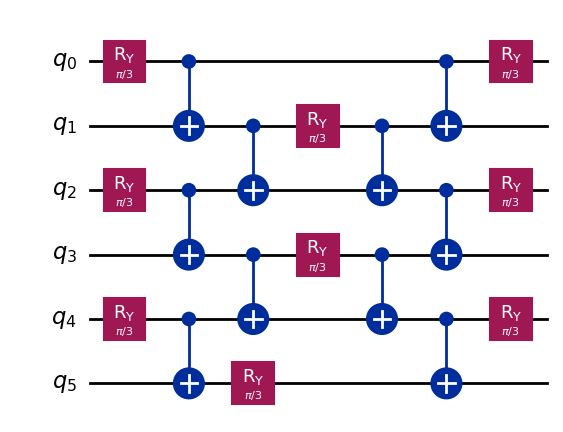

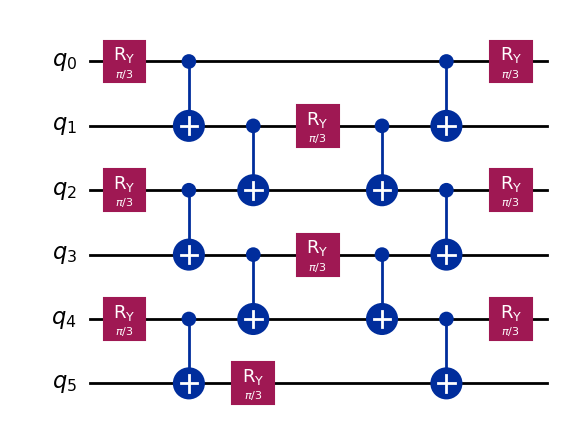

In [509]:
qc_1n = QuantumCircuit(6)

# Depth 1
qc_1n.ry(np.pi/3, 0)
qc_1n.ry(np.pi/3, 2)
qc_1n.ry(np.pi/3, 4)

# Depth 2
qc_1n.cx(0,1)
qc_1n.cx(2,3)
qc_1n.cx(4,5)

# Depth 3
qc_1n.cx(1,2)
qc_1n.cx(3,4)
qc_1n.ry(np.pi/3, 5)

# Depth 4
qc_1n.ry(np.pi/3, 1)
qc_1n.ry(np.pi/3, 3)

# Depth 5
qc_1n.cx(1,2)
qc_1n.cx(3,4)

# Depth 6
qc_1n.cx(0,1)
qc_1n.cx(2,3)
qc_1n.cx(4,5)

# Depth 7
qc_1n.ry(np.pi/3, 0)
qc_1n.ry(np.pi/3, 2)
qc_1n.ry(np.pi/3, 4)

qc_1n.draw('mpl')

## **1o)**

Consider the following parameterized circuit. Define it in `Qiskit` and optimize the parameters to maximize the squared overlap with the circuit you created in task **1n**. You may choose the optimizer and starting point as you wish. You may also create larger parameterized circuits by repeating this unit layer (increasing the number of parameters). **Print the highest squared overlap you are able to obtain.**

*Hint: you can calculate the squared overlap between two statevectors as the square of the absolute value of their inner product.*

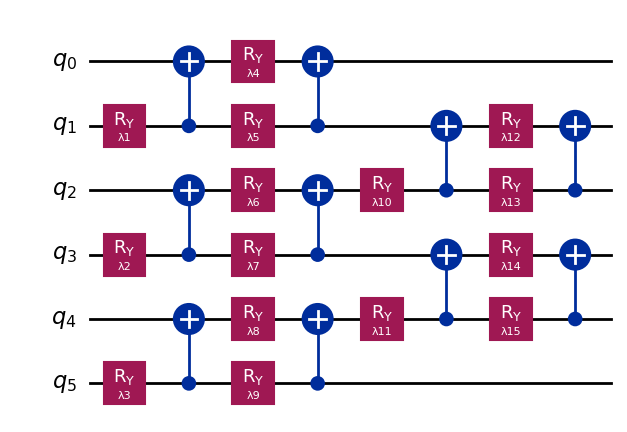

In [510]:
def circuit_1o(lambda_list):
    qc = QuantumCircuit(6)
    # Depth 1
    qc.ry(lambda_list[0], 1)
    qc.ry(lambda_list[1], 3)
    qc.ry(lambda_list[2], 5)
    # Depth 2
    qc.cx(1, 0)
    qc.cx(3, 2)
    qc.cx(5, 4)
    # Depth 3
    qc.ry(lambda_list[3], 0)
    qc.ry(lambda_list[4], 1)
    qc.ry(lambda_list[5], 2)
    qc.ry(lambda_list[6], 3)
    qc.ry(lambda_list[7], 4)
    qc.ry(lambda_list[8], 5)
    # Depth 4
    qc.cx(1, 0)
    qc.cx(3, 2)
    qc.cx(5, 4)
    # Depth 5
    qc.ry(lambda_list[9], 2)
    qc.ry(lambda_list[10], 4)
    # Depth 6
    qc.cx(2, 1)
    qc.cx(4, 3)
    # Depth 7
    qc.ry(lambda_list[11], 1)
    qc.ry(lambda_list[12], 2)
    qc.ry(lambda_list[13], 3)
    qc.ry(lambda_list[14], 4)
    # Depth 8
    qc.cx(2, 1)
    qc.cx(4, 3)
    return qc

In [ ]:

def obj_fn(optimized_lambda_list, target_statevector):
    qc_1o = circuit_1o(optimized_lambda_list)
    state_1o = Statevector(qc_1o)
    # minimizing negative fidelity is the same as maximizing fidelity
    return -np.abs(np.vdot(target_statevector.data, state_1o.data))**2

# initial guess
init_params = np.random.uniform(low=0, high=np.pi, size=15)

state_1n = Statevector(qc_1n)

res = minimize(
    obj_fn,
    init_params,
    args=(state_1n,),
    method='Powell',
    options={'disp': False}
)

max_fid = -res.fun
print(f"Highest squared overlap: {max_fid}")

Highest squared overlap: 0.6264474632126636


# Task 2

## **2a)**

Create a 3 qubit circuit and apply the Hadamard transform as shown below. Run the circuit using `Aersimulator` and **print the statevector states and coefficients**. Generalize the code to an $n$-qubit circuit and test different numbers of qubits. What happens? Discuss the result with your team.

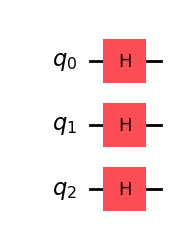

In [538]:
# Print the statevector states and coefficients
NUM_QUBITS = 3

qc = QuantumCircuit(NUM_QUBITS, NUM_QUBITS)
qc.h(range(NUM_QUBITS))
state = Statevector(qc)
state.draw("latex")

# This generates the uniform superposition of an n-qubit state, where every computational basis element has the same amplitude 1/sqrt(2^n)


<IPython.core.display.Latex object>

In [539]:
# Run the circuit using AerSimulator

backend = AerSimulator()

for qubit in range(NUM_QUBITS):
    qc.measure(qubit, qubit)
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots = 1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'011': 127, '111': 130, '100': 129, '001': 130, '110': 143, '010': 117, '000': 112, '101': 136}


## **2b)**  

Consider a single qubit. We want a circuit that reflects the |0> state (adding a minus sign, $-$|0>) and leaves |1> unchanged. Create this circuit using any sequence of Pauli gates (X, Y, Z). Test your solution by applying it after the Hadamard transform and seeing the statevector coefficients. **Draw the circuit.**

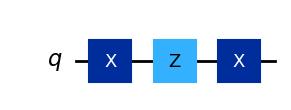

In [ ]:
# Draw the circuit
qc = QuantumCircuit(1, 0)
qc.x(0)
qc.z(0)
qc.x(0)
qc.draw("mpl")

In [ ]:
# Test the circuit
qc = QuantumCircuit(1, 0)
qc.h(0)

qc.x(0)
qc.z(0)
qc.x(0)

qi.Statevector.from_instruction(qc).draw("latex")

<IPython.core.display.Latex object>

## **2c)**  

Generalize the zero-reflection operator to $2$ qubits, then to $n$ qubits. **Draw the circuit for n=6.**

This circuit adds a sign only to the all-0 state $\ket{0}^{\otimes n}$, and leaves all others unchanged.

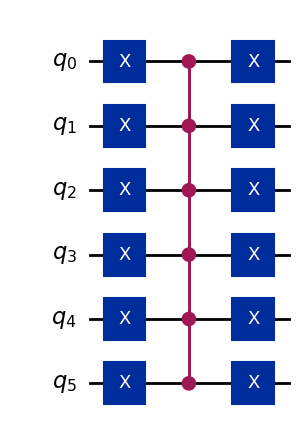

In [ ]:
NUM_QUBITS = 6
qc = QuantumCircuit(NUM_QUBITS, 0)

qc.x(range(NUM_QUBITS))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range(NUM_QUBITS))
zero_reflection = qi.Operator(qc)
qc.draw("mpl")

## **2d)**  

 Now we want to reflect an arbitrary state, initialized by a given operator $A$. Consider this operator to be the Hadamard transform (you can convert it to a gate using the `to_gate(label="A")` instruction on the circuit). Implement the reflection circuit for arbitrary $n$. **Draw the circuit for $n=6$.**

 _Hint: Reuse the operator you defined in **2c**._

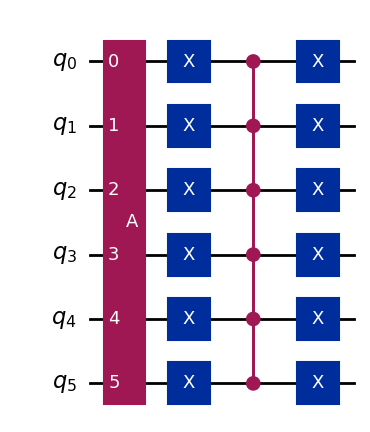

In [516]:
hadamard_circuit = QuantumCircuit(NUM_QUBITS, 0)
hadamard_circuit.h(range(NUM_QUBITS))
a_gate = hadamard_circuit.to_gate(label="A")

qc = QuantumCircuit(NUM_QUBITS, 0)
qc.append(a_gate, list(range(NUM_QUBITS)))
# qc.append(zero_reflection, range(NUM_QUBITS))
qc.x(range(NUM_QUBITS))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range(NUM_QUBITS))
qc.draw("mpl")

We are unsure if the reflection operator is meant to include another Hadamard ($A^\dagger$) layer. This doesn't seem to be implied by the question, but it *does* seem necessary later starting in 2f.

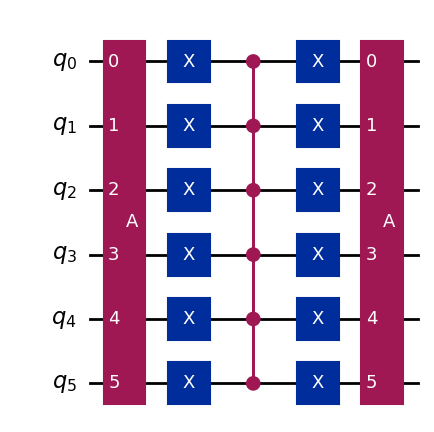

In [ ]:
# A second intepretation
qc.append(a_gate, list(range(NUM_QUBITS)))
qc.draw("mpl")

## **2e)**  

Consider the state `w='010101...'` (alternating between 0 and 1) for arbitrary lengths. Build a circuit that reflects this state (and leaves all others unchanged) for arbitrary $n$. We'll call this circuit *the oracle*. **Draw it for $n=3$ and print the statevector coefficients.**

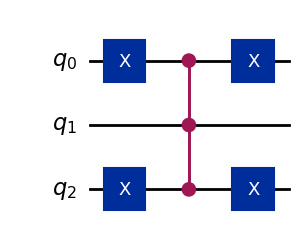

In [541]:
NUM_QUBITS = 3
qc = QuantumCircuit(NUM_QUBITS, 0)
qc.x(range((NUM_QUBITS + 1)% 2, NUM_QUBITS, 2))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range((NUM_QUBITS + 1)% 2, NUM_QUBITS, 2))
w_reflection = qi.Operator(qc)
qc.draw("mpl")

This is the effect of the circuit on the uniform superposition: It only reflects $\ket{010}$, as desired.

In [542]:
qc = QuantumCircuit(NUM_QUBITS, 0)
qc.h(range(NUM_QUBITS))
qc.append(w_reflection, range(NUM_QUBITS))

Statevector(qc).draw("latex")

<IPython.core.display.Latex object>

## **2f)**  

Build an operator consisting of the sequential application of the oracle and the reflection-of-$A$ operator, by this order, with $A$ as defined previously. Create a function that given $A$, the oracle, and an integer `m`, returns a circuit that applies $A$, followed by `m` repetitions of the operator you just created. Test this circuit for $A$ and the oracle defined previously, and increasing ms: `m = [0, 1, 2, 3, 4, ..., 20]`. **Plot the final amplitude (statevector coefficient) of `w`** (as defined in **2e**) **as a function of `m`.**

_Suggestion: Do this using an auxiliary function `get_data(A, oracle, ms)` that returns `xs`, a list of the data in correspondence with `ms` (in this case, the `xs` are amplitudes)._

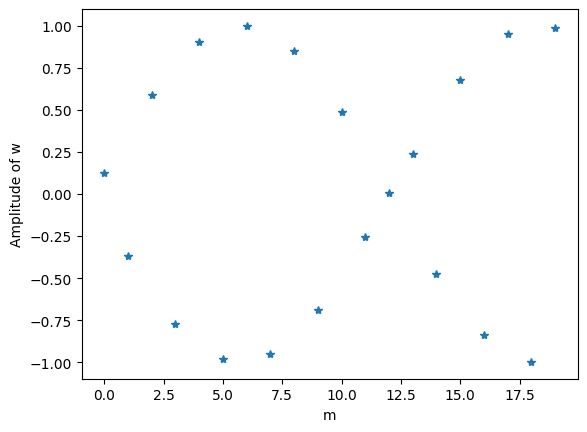

In [544]:
NUM_QUBITS = 6

# Redo the w_reflection for 6 qubits
qc = QuantumCircuit(NUM_QUBITS, 0)
qc.x(range((NUM_QUBITS + 1)% 2, NUM_QUBITS, 2))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range((NUM_QUBITS + 1)% 2, NUM_QUBITS, 2))
w_reflection = qi.Operator(qc)

# This is our reflection of A Operator: A and then reflect through |0>
hadamard_circuit = QuantumCircuit(NUM_QUBITS, 0)
hadamard_circuit.h(range(NUM_QUBITS))
a_gate = hadamard_circuit.to_gate(label="A")

qc = QuantumCircuit(NUM_QUBITS, 0)
qc.append(a_gate, range(NUM_QUBITS))
qc.x(range(NUM_QUBITS))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range(NUM_QUBITS))
qc.append(a_gate, range(NUM_QUBITS)) # Extra application of H becuase it seems like we need it... where does the question say to add this?
reflection_of_a = qi.Operator(qc)

# Now our "oracle":
qc = QuantumCircuit(NUM_QUBITS, 0)
qc.x(range(0, NUM_QUBITS, 2))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range(0, NUM_QUBITS, 2))
oracle = qi.Operator(qc)

def sequential_reflection(a_gate, oracle, m: int):
    # Now the iterator which has *both* of these operators:
    qc = QuantumCircuit(NUM_QUBITS, 0)
    qc.append(oracle, range(NUM_QUBITS))
    qc.append(reflection_of_a, range(NUM_QUBITS))
    iterator = qi.Operator(qc)

    result = QuantumCircuit(NUM_QUBITS, NUM_QUBITS) # add classical ancillas for measurement later
    result.append(a_gate, range(NUM_QUBITS))
    for i in range(m):
        result.append(iterator, range(NUM_QUBITS))
    return result

w_amplitude_index = 0
for i in range(NUM_QUBITS-2, -1, -2):
    w_amplitude_index += 2**i

def get_data_2f(A, oracle, ms):
    result = []
    for m in ms:
        qc = sequential_reflection(A, oracle, m)
        result.append(qi.Statevector.from_instruction(qc).data[w_amplitude_index])
    return result

m_values = list(range(20))
amplitude_values = get_data_2f(a_gate, w_reflection, m_values)

plt.plot(m_values, np.real(amplitude_values), "*")
plt.xlabel("m")
plt.ylabel("Amplitude of w")
plt.show()

## **2g)**  

Add the reference $A(m) = \sin\big((2m+1)*\arcsin(\sqrt{p_\text{true}})\big)$, where $p_\text{true}=1/2^n$ and $n$ is the number of qubits, to the previous plot. **Plot the points of 2f along with this curve.**

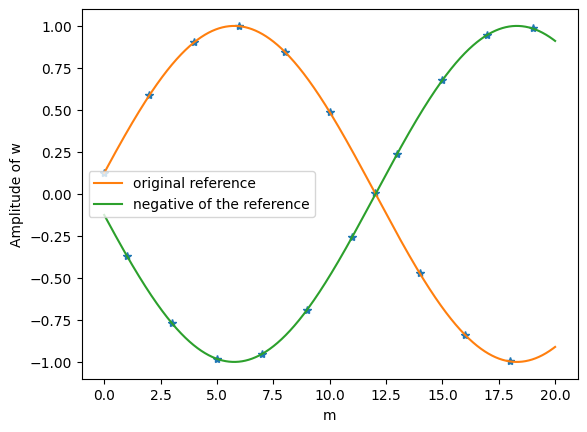

In [546]:
plt.plot(m_values, np.real(amplitude_values), "*")

smooth_m_values = np.arange(0, 20, 0.001)
p_true = 1.0 / 2**NUM_QUBITS
y_values = np.sin((2 * smooth_m_values + 1) * np.arcsin(np.sqrt(p_true)))
plt.plot(smooth_m_values, y_values, label="original reference")
plt.plot(smooth_m_values, -y_values, label="negative of the reference") # TODO should we add this other curve?
plt.xlabel("m")
plt.ylabel("Amplitude of w")
plt.legend()
plt.show()

## **2h)**  

Repeat the plot of **2f**, but change the following: run the circuits using the Aer simulator with 1024 shots, and **plot the number of times `w` was measured as a function of `m`, using $\text{Nshots}*P(m)$ as a reference, with $P(m)=A(m)^2$.**

_Suggestion: Do this by modifying the `get_data` function to accept an optional argument `Nshots`, and return a list of integers (numbers of times `w` was measured)._

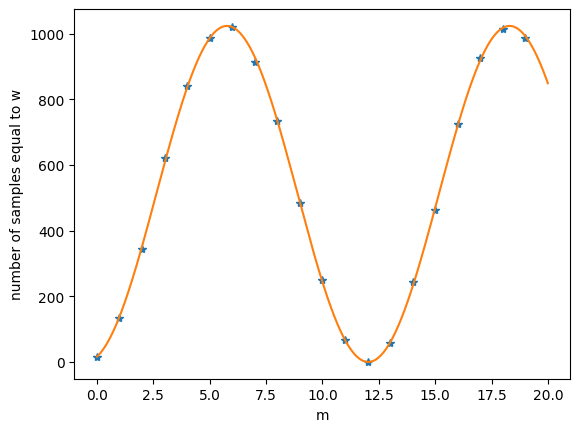

In [547]:
# We redefine the get_data function, adding measurements and counting samples instead of tracking amplitudes
w_string = "01" * (NUM_QUBITS // 2)
if NUM_QUBITS % 2 == 1:
    w_string += "0"

backend = AerSimulator()

def get_data(A, oracle, ms, Nshots: int = 1024):
    result = []
    for m in ms:
        qc = sequential_reflection(A, oracle, m)
        for qubit in range(NUM_QUBITS):
            qc.measure(qubit, qubit)
        qc_compiled = transpile(qc, backend)
        job_sim = backend.run(qc_compiled, shots = Nshots)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(qc_compiled)
        try:
            result.append(counts[w_string])
        except KeyError:
            result.append(0)
        
    return result

m_values = list(range(20))
amplitude_values = get_data(a_gate, w_reflection, m_values)

plt.plot(m_values, np.real(amplitude_values), "*")

probabilities = [1024 * x**2 for x in y_values]
plt.plot(smooth_m_values, probabilities)

plt.xlabel("m")
plt.ylabel("number of samples equal to w")
plt.show()

## **2i)**  

Consider the parameter $p$, defined as the probability of measuring `w` after applying $A$, which you should think of as an unknown (although in this case we know it to be $1/2^n$, as follows from the operators we constructed).

Given an `m` and an `x` (number of times `w` was the measurement outcome), you can now calculate the likelihood $L$ (probability of generating the datum) for any $p \in [0,1]$ using the square of the sine function from **2g**. E.g., for a single shot measurement, $L(p \mid m, x=1) = \sin\big((2m+1)*\arcsin(\sqrt{p})\big)^2$, and $L(p \mid m, x=0)$ is its complement.

Generalize this calculation for a dataset (`ms`, `xs`), using the multiplication rule for joint probabilities of independent events. Collect data for `ms = [0, 1, 2, 3, 4, 5]` with $100$ shots each using the `get_data` function from before, and **plot the likelihood as a function of $p$.** Mark the real value with a dashed vertical bar as a reference.



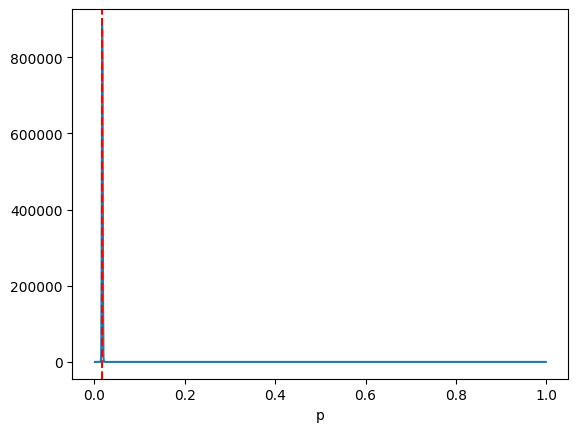

In [548]:

NUM_SHOTS = 100
ms = list(range(6))
xs = get_data(a_gate, w_reflection, ms, NUM_SHOTS)

p_values = np.arange(0.001, 1, 0.001)

def calc_point(p):
    result = 1
    for m, x in zip(ms, xs):
        prob_hit = np.sin((2*m + 1) * np.arcsin(np.sqrt(p)))**2
        prob_miss = 1 - prob_hit
        result *= prob_hit**(x) * prob_miss**(NUM_SHOTS - x) * math.comb(NUM_SHOTS, x) * 101
    return result
plt.plot(p_values, [calc_point(p) for p in p_values])
plt.axvline(1/2**NUM_QUBITS, linestyle='--', color='red')
plt.xlabel("p")
plt.show()

## **2j)**  

Consider the task of estimating $p$ from data. We can do this by maximizing the likelihood. Create a function `maximize_likelihood(ms, xs, Nshots)` that does this, using an optimization function from `scipy.optimize`. Test this function for the data of **2i**, and **print the value of $p$ that maximizes its value**.

In [ ]:

def maximize_likelihood(ms, xs, Nshots):
    optimization_trials = 100 * max(ms) # TODO pick a good number here

    def calc_point(p):
        result = 1
        for m, x in zip(ms, xs):
            prob_hit = np.sin((2*m + 1) * np.arcsin(np.sqrt(np.abs(p))))**2
            prob_miss = 1 - prob_hit
            result *= prob_hit**(x) * prob_miss**(Nshots - x) * math.comb(Nshots, x) * 101
        return result

    def obj_fun(p):
        return -1 * calc_point(p)

    best_param = 0
    optimal_value = -np.inf
    for i in range(optimization_trials):
        init = random.random()
        res = minimize(
            obj_fun,
            init,
            method="L-BFGS-B",
            bounds=[(0,1)],
        )

        this_param = res.x
        this_value = -res.fun
        if this_value > optimal_value:
            optimal_value = this_value
            best_param = this_param
    
    if type(best_param) == np.ndarray:
        return best_param[0]
    return best_param

# Test function on values from previous part
print(maximize_likelihood(ms, xs, NUM_SHOTS))

0.015236940575795775


## **2k)**   

Now we want to consider how the error (absolute deviation from the true value $p_t$) evolves with the cost, defined as the number of calls to the $A$ operator, $N=2m+1$. **Plot the error as a function of $N$ in a log-log scale**, by using the strategy of **2j** to produce incremental estimates on cumulative datasets: `ms=[0]`, then `ms=[0,1]`, ..., until `ms=[0,...,mmax]`. Use `mmaxx = 15`.

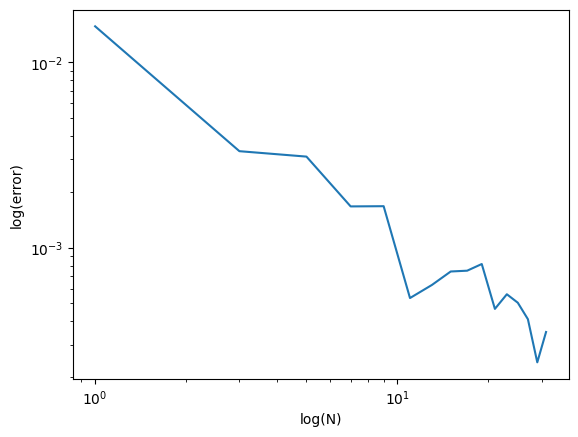

In [549]:
mmaxx = 15
ms = [m for m in range(mmaxx + 1)]
xs = get_data(a_gate, w_reflection, ms, NUM_SHOTS)
exact_value = 1/2**NUM_QUBITS
estimates = []
for mmax in range(mmaxx + 1):
    this_ms = ms[:mmax+1]
    this_xs = xs[:mmax+1]
    this_estimate = maximize_likelihood(this_ms, this_xs, NUM_SHOTS)
    estimates.append(this_estimate)

assert(len(estimates) == mmaxx + 1)

N_values = [2*m + 1 for m in range(mmaxx + 1)]
errors = [np.abs(estimate - exact_value) for estimate in estimates]
plt.loglog(N_values, errors)
plt.xlabel("log(N)")
plt.ylabel("log(error)")
plt.show()

## **2l)**  

The results are affected by statistical noise. To reduce this effect, consider the root mean squared errors (RMSEs) over $100$ runs (instead of the error for a single execution as in **2k**).  **Plot the RMSEs as a function of $N$ in a log-log scale**.

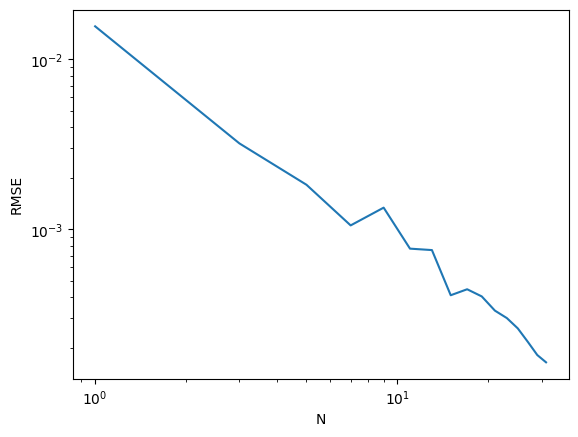

In [550]:
NUM_RUNS = 10
x_library = []
for run in range(NUM_RUNS):
    x_library.append(get_data(a_gate, w_reflection, ms, NUM_SHOTS))

estimates = []
for i, mmax in enumerate(range(mmaxx + 1)):
    this_ms = ms[:mmax+1]
    this_estimate_group = []
    for j in range(NUM_RUNS):
        this_estimate_group.append(maximize_likelihood(this_ms, x_library[j], NUM_SHOTS))
    estimates.append(this_estimate_group)

assert(len(estimates) == mmaxx + 1)

N_values = [2*m + 1 for m in range(mmaxx + 1)]
# N_values = [m**2 for m in range(mmaxx + 1)] # Do we consider the A uses for all the circuits or just the biggest/most recent one?
errors = [np.sqrt(((group - np.array([exact_value] * NUM_RUNS))**2).mean()) for group in estimates]
plt.loglog(N_values, errors)
plt.xlabel("N")
plt.ylabel("RMSE")
plt.show()

## **2m**)

You can now compare the performance of your algorithm with the limits of metrology, the standard quantum limit (SQL, $\mathcal O (N^{-1/2})$ - best case for classical algorithms) and the Heisenberg limit (HL, $\mathcal O (N^{-1})$ - best case for quantum algorithms). **Make a new plot including these limits as a reference (dashed lines) in addition to the values in the plot of 2l.** Use the prefactors $0.35$ and $3$ for the SQL and HL respectively. Using curve fitting, obtain an approximate exponent $k$ in $\mathcal O (N^{-k})$ for the points you obtained and **print this exponent $k$**.

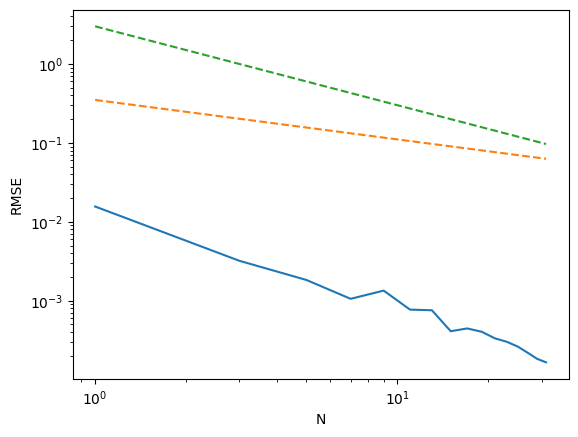

In [551]:
def sql(N):
    return 0.35 * N**(-1/2.0)

def hl(N):
    return 3 * N**(-1)

plt.loglog(N_values, errors)
plt.loglog(N_values, [sql(n) for n in N_values], linestyle="--")
plt.loglog(N_values, [hl(n) for n in N_values], linestyle="--")
plt.xlabel("N")
plt.ylabel("RMSE")
plt.show()

## **2n**)

Repeat **2m**, but using `ms = [0, 1, 2, 4, 8, ..., 2**l]` for `l=6`. **Add this alternative strategy to the previous plot.** Calculate and **print $k$ for this dataset**.

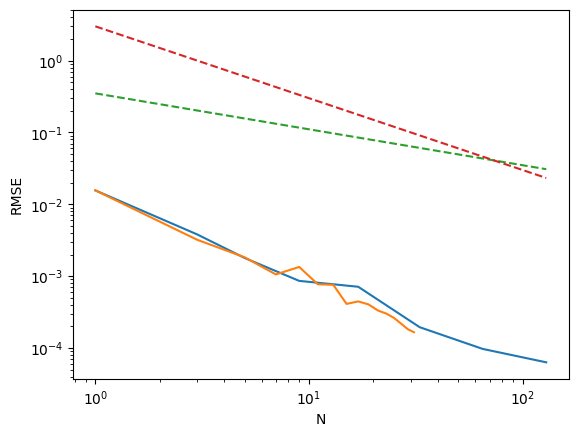

In [552]:
ms = [0] + [2**l for l in range(7)]
old_errors = errors.copy()

NUM_RUNS = 10
x_library = []
for run in range(NUM_RUNS):
    x_library.append(get_data(a_gate, w_reflection, ms, NUM_SHOTS))

estimates = []
for i in range(7 + 1):
    this_ms = ms[:i+1]
    this_estimate_group = []
    for j in range(NUM_RUNS):
        this_estimate_group.append(maximize_likelihood(this_ms, x_library[j], NUM_SHOTS))
    estimates.append(this_estimate_group)

assert(len(estimates) == 8)

new_N_values = [2*m + 1 for m in ms]
errors = [np.sqrt(((group - np.array([exact_value] * NUM_RUNS))**2).mean()) for group in estimates]

def sql(N):
    return 0.35 * N**(-1/2.0)

def hl(N):
    return 3 * N**(-1)

plt.loglog(new_N_values, errors)
plt.loglog(N_values, old_errors)
plt.loglog(new_N_values, [sql(n) for n in new_N_values], linestyle="--")
plt.loglog(new_N_values, [hl(n) for n in new_N_values], linestyle="--")
plt.xlabel("N")
plt.ylabel("RMSE")
plt.show()

## **2o)**

**Repeat the plot of **2l**, but now with the maximum number of CNOTs in the horizontal axis** (instead of $N$). To obtain this number, decompose the circuit into single-qubit gates and CNOT gates and count the latter.

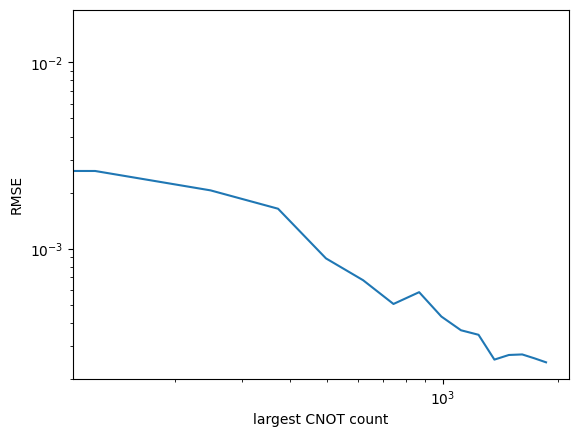

In [554]:
# TODO why are we calculating this all over again? Just make sure the results are saved from 2l?

mmaxx = 15
ms = [m for m in range(mmaxx + 1)]
exact_value = 1/2**NUM_QUBITS

NUM_RUNS = 10
x_library = []
for run in range(NUM_RUNS):
    x_library.append(get_data(a_gate, w_reflection, ms, NUM_SHOTS))

estimates = []
for i, mmax in enumerate(range(mmaxx + 1)):
    this_ms = ms[:mmax+1]
    this_estimate_group = []
    for j in range(NUM_RUNS):
        this_estimate_group.append(maximize_likelihood(this_ms, x_library[j], NUM_SHOTS))
    estimates.append(this_estimate_group)

assert(len(estimates) == mmaxx + 1)

# A 6 qubit c-Z gate can be implemented with 62 C-not gates, and each iterator operator contains two of these
# c-Zs across 6 qubits: one for the reflection through |000000>, and one for the oracle.
cnot_values = [124 * m for m in range(mmaxx + 1)]
errors = [np.sqrt(((group - np.array([exact_value] * NUM_RUNS))**2).mean()) for group in estimates]
data_archive_2o = [cnot_values, errors]
plt.loglog(cnot_values, errors)
plt.xlabel("largest CNOT count")
plt.ylabel("RMSE")
plt.show()

# Task 3

We now want to combine the insights of the 2 previous tasks. The goal is to improve the estimation of $p$ (as in tasks **2j** to **2o**) by using shorter parametrized circuits to approximate the intended circuits (as in task **1o**). Use the A operator and the oracle as defined in task 2, for 6 qubits.

**Create a plot as in task 2o, but now employing your shallower circuits**.

<ins>The goal is to have the fastest possible convergence of the RMSE with respect to the maximum CNOT count.</ins>

Ignore the costs of optimizing the parametrized circuits. Consider only the CNOTs required by the circuits you use to generate the data.

You may change the sequence of `ms`, the structure of the parametrized circuits, the optimization strategy, etc.

_Hint: You can start by using the parameterized circuit of **1o**, and ms = [0, 1, 2, ...] as in task **2k**. Periodically replace chunks of the circuit by shallower parametrized circuits when the number of operators crosses a threshold of your choice._

**Write a short explanation of your strategy in markdown below.**

Explanation:

Our approach was to try the simplest thing we could think of first, and to our surprise it worked pretty well! 😀

We use the same 15-paramater circuit from 1o (with 10 CNOT gates) as the base unit for our approximating circuits.
Since all we need is 

In [ ]:
NUM_QUBITS = 6
NUM_SHOTS = 100

In [531]:
# Define common gates & operators

#  w_reflection
qc = QuantumCircuit(NUM_QUBITS, 0)
qc.x(range((NUM_QUBITS + 1)% 2, NUM_QUBITS, 2))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range((NUM_QUBITS + 1)% 2, NUM_QUBITS, 2))
w_reflection = qi.Operator(qc)

# reflection of A Operator (A and then reflect through |0>)
hadamard_circuit = QuantumCircuit(NUM_QUBITS, 0)
hadamard_circuit.h(range(NUM_QUBITS))
# A gate
a_gate = hadamard_circuit.to_gate(label="A")
qc = QuantumCircuit(NUM_QUBITS, 0)
qc.append(a_gate, range(NUM_QUBITS))
qc.x(range(NUM_QUBITS))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range(NUM_QUBITS))
qc.append(a_gate, range(NUM_QUBITS)) # Extra application of H becuase it seems like we need it... where does the question say to add this?
reflection_of_a = qi.Operator(qc)

# Oracle (reflection through |01010...>)
qc = QuantumCircuit(NUM_QUBITS, 0)
qc.x(range((NUM_QUBITS + 1)% 2, NUM_QUBITS, 2))
cz_gate = qulib.ZGate().control(NUM_QUBITS - 1)
qc.append(cz_gate, list(range(NUM_QUBITS)))
qc.x(range((NUM_QUBITS + 1)% 2, NUM_QUBITS, 2))
oracle = qi.Operator(qc)

# returns a full circuit for some m
def sequential_reflection_simple(m: int):
    # Now the iterator which has *both* of these operators:
    qc = QuantumCircuit(NUM_QUBITS, 0)
    qc.append(oracle, range(NUM_QUBITS))
    qc.append(reflection_of_a, range(NUM_QUBITS))
    iterator = qi.Operator(qc)

    result = QuantumCircuit(NUM_QUBITS, NUM_QUBITS) # add classical ancillas for measurement later
    result.append(a_gate, range(NUM_QUBITS))
    for i in range(m):
        result.append(iterator, range(NUM_QUBITS))
    return result

In [532]:
# Now support arbitrarily many blocks

def approximate_circuit(target_state, num_blocks):
    init_params = np.random.uniform(low=0, high=2*np.pi, size=15 * num_blocks)

    def obj_fn(lambdas, target_state):
        chain_circuit = QuantumCircuit(NUM_QUBITS, 0)
        for i in range(num_blocks):
            this_circuit = circuit_1o(lambdas[15*i:15*(i+1)])
            chain_circuit.append(this_circuit, range(NUM_QUBITS))
        estimated_state = Statevector(chain_circuit)
        return -np.abs(np.vdot(target_state.data, estimated_state.data))**2
    res = minimize(
        obj_fn,
        init_params,
        args=(target_state,),
        method='Powell',
    )
    max_fid = -res.fun
    params = res.x
    # print(f"Highest squared overlap: {max_fid} (with {num_blocks} blocks)")
    result = QuantumCircuit(NUM_QUBITS, NUM_QUBITS) # include classical qubits for measuring x counts
    for i in range(num_blocks):
        this_circuit = circuit_1o(params[15*i:15*(i+1)])
        result.append(this_circuit, range(NUM_QUBITS))
    return result

def approximate_m_circuit(m, num_blocks):
    target_circuit = sequential_reflection_simple(m)
    target_state = qi.Statevector.from_instruction(target_circuit)
    return approximate_circuit(target_state, num_blocks)

In [533]:
# Use this to define a new get_data(ms, NUM_SHOTS)
def get_data(qcs, Nshots):
    result = []
    for qc in qcs:
        for qubit in range(NUM_QUBITS):
            qc.measure(qubit, qubit)
        qc_compiled = transpile(qc, backend)
        job_sim = backend.run(qc_compiled, shots = Nshots)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(qc_compiled)
        try:
            # We redefine the get_data function, adding measurements and counting samples instead of tracking amplitudes
            w_string = "01" * (NUM_QUBITS // 2)
            if NUM_QUBITS % 2 == 1:
                w_string += "0"
            result.append(counts[w_string])
        except KeyError:
            result.append(0)
    return result

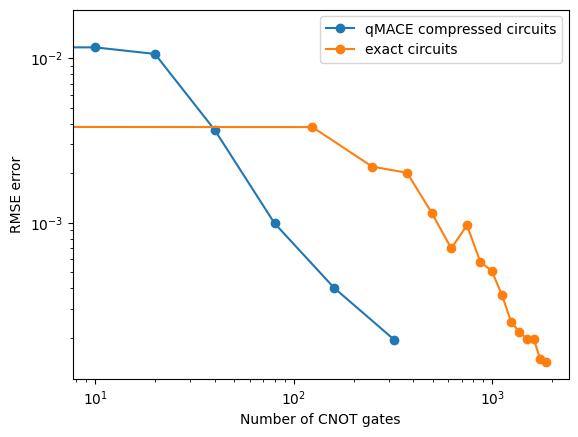

In [534]:
# Now use these approximations to estimate p, as in part 2

m_library =  [0, 1, 2, 4, 8, 16, 32]
block_nums = [1, 1, 1, 2, 3, 4, 5] # how many estimating blocks to use for each of the above m values, respectively
circuits = []
for m, b in zip(m_library, block_nums):
    this_circuit = approximate_m_circuit(m, b)
    circuits.append(this_circuit)

NUM_RUNS = 50
x_library = []
for run in range(NUM_RUNS):
    x_library.append(get_data(circuits, NUM_SHOTS))

estimates = []
for i in range(1, len(m_library) + 1):
    this_ms = m_library[:i]
    this_estimate_group = []
    for j in range(NUM_RUNS):
        # We can reuse the same maximize likelihood function
        this_estimate_group.append(maximize_likelihood(this_ms, x_library[j], NUM_SHOTS))
    estimates.append(this_estimate_group)

N_values = [10*m for m in m_library]
errors = [np.sqrt(((group - np.array([exact_value] * NUM_RUNS))**2).mean()) for group in estimates]
plt.loglog(N_values, errors, 'o-', label="qMACE compressed circuits")
plt.loglog(*data_archive_2o, 'o-', label="exact circuits")
plt.xlabel("Number of CNOT gates")
plt.ylabel("RMSE error")
plt.legend()
plt.show()